#WhatsApp Group Chat Analysis


In [23]:
#Importing the required libraries
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
#Warnings get ignored
warnings.filterwarnings('ignore')

In [24]:
#selecting the file and setting formats
file="whatsapp.txt"
key="12hr"
split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }

In [25]:
#opening and reading a file
with open(file, 'r', encoding='utf-8') as raw_data:
    # converting the list split by newline char. as one whole string as there can be multi-line messages
    raw_string = ' '.join(raw_data.read().split('\n')) 
    # splits at all the date-time pattern, resulting in list of all the messages with user names
    user_msg = re.split(split_formats[key], raw_string) [1:] 
    # finds all the date-time patterns
    date_time = re.findall(split_formats[key], raw_string) 
    # finds all the date-time patterns
    df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df

In [26]:
# converting date-time pattern which is of type String to type datetime,
# format is to be specified for the whole string where the placeholders are extracted by the method 
df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
# split user and msg 
usernames = []
msgs = []
for i in df['user_msg']:
    a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
    if(a[1:]): # user typed messages
        usernames.append(a[1])
        msgs.append(a[2])
    else: # other notifications in the group(eg: someone was added, some left ...)
        usernames.append("group_notification")
        msgs.append(a[0])
# creating new columns         
df['user'] = usernames
df['message'] = msgs
# dropping the old user_msg col.
df.drop('user_msg', axis=1, inplace=True)   
df    

,date_time,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...
...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup


In [27]:
#Checking the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.2+ KB


In [28]:
#Checking the sample of df
df.sample(10)

,date_time,user,message
13067,2020-09-25 13:32:00,"Tanay Kamath (TSEC, CS)",Udemy:mai job chod du?
3592,2020-03-21 10:56:00,+91 75078 05454,
5143,2020-04-22 23:08:00,+91 75078 05454,👍🏻
722,2020-02-12 18:27:00,"Ankit (TSEC, CS)",@919920175875
6770,2020-05-28 03:22:00,"Kartik Soneji (TSEC, CS)","Well, it looks like a solid color."
7772,2020-06-16 14:17:00,"Dheeraj Lalwani (TSEC, CS)",😂
7507,2020-06-13 00:00:00,"Dheeraj Lalwani (TSEC, CS)",There was this HTML ka assignment I had done i...
4835,2020-04-15 22:40:00,"Saurav Upoor (TSEC CS, SE)",upsolve 🤷‍♂️
8871,2020-07-13 21:29:00,"Darshan Rander (TSEC, IT)",Already done
13259,2020-09-28 17:58:00,"Darshan Rander (TSEC, IT)",Fuck I'm scared fir mereko ye ad kyu?😶


In [29]:
#Checking the shape of the message
df[df['message'] == ""].shape[0]

538

In [30]:
#Adding extra helper columns for analysis and visualization
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [31]:
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


In [32]:
#Copying the file rto df1 
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2020-01-24,1
1,2020-01-26,105
2,2020-01-27,90
3,2020-01-28,126
4,2020-01-29,118
...,...,...
237,2020-09-28,144
238,2020-09-29,49
239,2020-09-30,167
240,2020-10-01,91


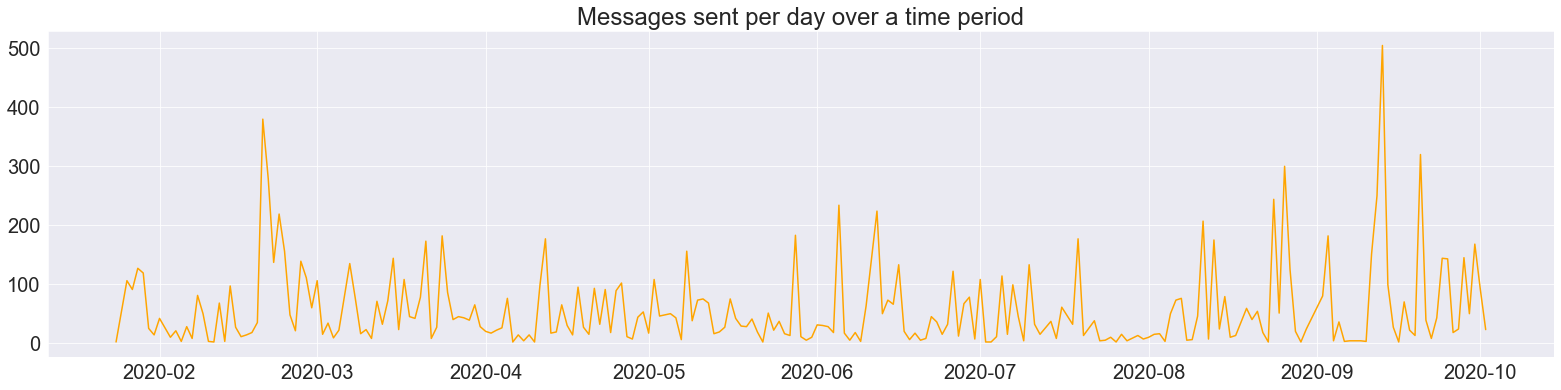

In [33]:
#Overall frequency of total messages on the group.

# Improving Default Styles using Seaborn
sns.set_style("darkgrid")
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`
# A basic plot
plt.plot(df1.date, df1.message_count,color="orange")
plt.title('Messages sent per day over a time period');
# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);   
# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

#Checking the trend for last 10days


In [34]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2020-09-13,504
1,2020-02-20,379
2,2020-09-20,319
3,2020-08-26,299
4,2020-02-21,278
5,2020-09-12,249
6,2020-08-24,243
7,2020-06-05,233
8,2020-06-12,223
9,2020-02-23,218


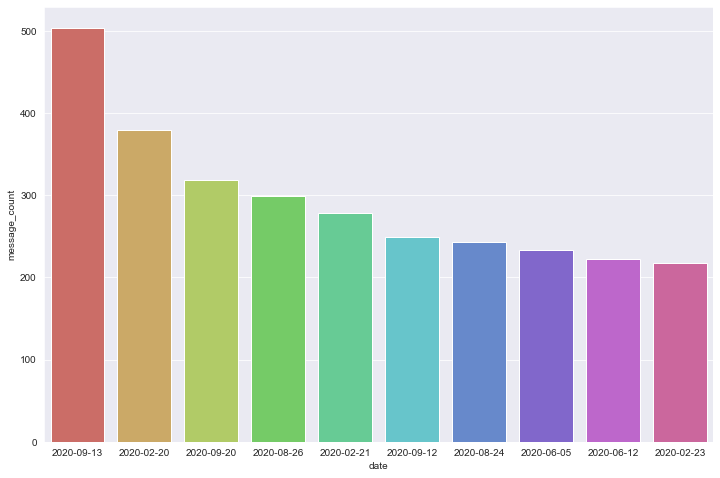

In [35]:
#plotting the graph for last 10 days
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)
# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count, palette="hls");
# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

# Top 10 active users on the group


In [36]:
# Total number of people who have sent at least one message on the group;
print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")   # `-1` because excluding "group_notficiation"
print(f"Number of people who haven't sent even a single message on the group are {237 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 154
Number of people who haven't sent even a single message on the group are 81


In [37]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,"Tanay Kamath (TSEC, CS)",2528
1,"Dheeraj Lalwani (TSEC, CS)",1937
2,"Darshan Rander (TSEC, IT)",1404
3,"Kartik Soneji (TSEC, CS)",841
4,"Harsh Kapadia (TSEC IT, SE)",790
5,"Pratik K (TSEC CS, SE)",781
6,"Saurav Upoor (TSEC CS, SE)",569
7,Tushar Nankani,354
8,+91 82916 21138,275
9,"Farhan Irani (TSEC IT, SE)",255


In [38]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.user[i].split()[0][0] + top10df.user[i].split()[1][0]
top10df.initials[7] = "Me"    # That's me
top10df.initials[8] = "DT"

In [39]:
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

0    TK
1    DL
2    DR
3    KS
4    HK
5    PK
6    SU
7    Me
8    DT
9    FI
Name: initials, dtype: object

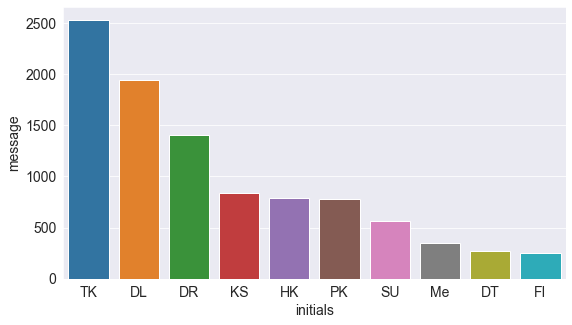

In [40]:
# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")
sns.barplot(top10df.initials, top10df.message, data=top10df);
top10df.initials

#Most used words in the chat


In [1]:
comment_words = ' '
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])
# iterate through the DataFrame.
for val in df3.message.values:
    # typecaste each val to string.
    val = str(val) 
    # split the value.
    tokens = val.split() 
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words)

NameError: name 'STOPWORDS' is not defined

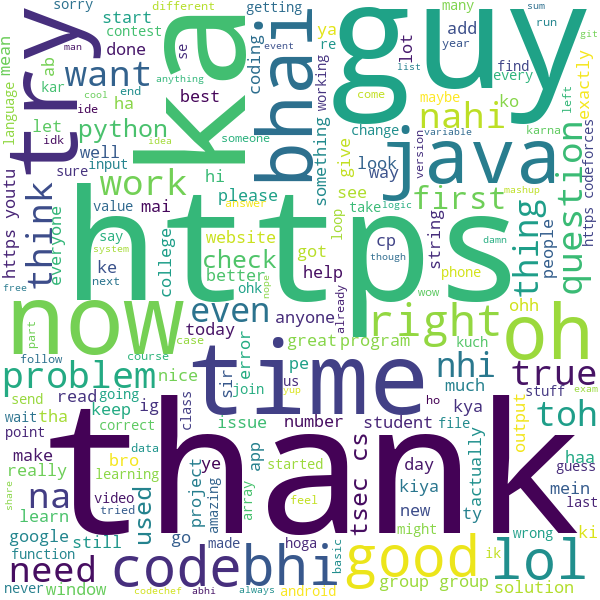

In [ ]:
wordcloud.to_image()